In [23]:
import pandas

# Load the Wine Quality Red dataset
file = pandas.read_csv("../../datasets/Position_Salaries.csv")

In [24]:
# use all datasets, dont split
X = file.iloc[:,1:2]
y = file.iloc[:,2:3]

# data is in regular array (1D)
print(X)
print(y)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
    Salary
0    45000
1    50000
2    60000
3    80000
4   110000
5   150000
6   200000
7   300000
8   500000
9  1000000


In [25]:
import numpy as np

# data converted to 2D array

X = np.array(X)
y = np.array(y)

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [26]:
# import the model, from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)

# 10 decision trees will be built when n_estimators=10
# it picks data randomly and plots decision trees again and again (here it builds 10 decision trees)
# thats why its called random forest

# train model
regressor.fit(X,y)

c:\Users\Amaan M k\anaconda3\envs\my-env-3-8-18\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [27]:
# predict some data
regressor.predict([[6.5]])

array([167000.])

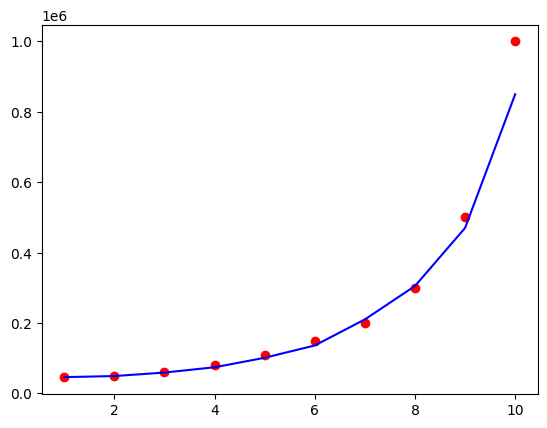

In [28]:
# plot the graph
import matplotlib.pyplot as plt

# original data
plt.scatter(X,y,color='red')

# predicted data
plt.plot(X,regressor.predict(X),color='blue')

Text(0, 0.5, 'Salary')

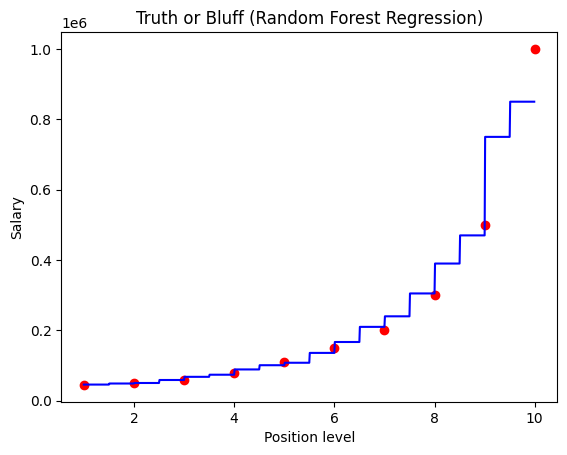

In [29]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((-1, 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

# doing predictions

In [30]:
# single value prediction for the Random Forest Regression Model
single_pred = regressor.predict([[6.5]])
print("single_pred: ",single_pred)

single_pred:  [167000.]


In [31]:
# all value predictions for the Random Forest Regression model

# print the predicted results with nice looking output
# displaying the headings 
headings = ['Data to test', 'Actual', 'Predicted']
print('{:<20} {:<20} {:<20}'.format(*headings))
# displaying the data
data_comparison = np.concatenate((X, y, regressor.predict(X).reshape(-1, 1)), axis=1)
for row in data_comparison:
    print('{:<20.2f} {:<20.2f} {:<20.2f}'.format(*row))

Data to test         Actual               Predicted           
1.00                 45000.00             46000.00            
2.00                 50000.00             49000.00            
3.00                 60000.00             59000.00            
4.00                 80000.00             74000.00            
5.00                 110000.00            101000.00           
6.00                 150000.00            136000.00           
7.00                 200000.00            210000.00           
8.00                 300000.00            305000.00           
9.00                 500000.00            470000.00           
10.00                1000000.00           850000.00           


# About Reshape

In [32]:
# reshape() makes row data to column
# here reshape(-1,5) means 
# -1 is to make row to colum and if given 1 then column to row
# 5 is to split the row in 5 data 

print(regressor.predict(X))
print(regressor.predict(X).reshape(-1, 5))

[ 46000.  49000.  59000.  74000. 101000. 136000. 210000. 305000. 470000.
 850000.]
[[ 46000.  49000.  59000.  74000. 101000.]
 [136000. 210000. 305000. 470000. 850000.]]
